# Análise do Impacto da Temperatura e Radiação Solar na Tensão e Eficiência Energética de um Painel Solar Fotovoltaico. Aplicação da Regressão Linear Múltipla e Regularização Ridge

Este projeto visa analisar os impactos da radiação solar e da temperatura sob a tensão elétrica de um módulo fotovoltaico. Iremos realizar uma Regressão Linear Múltipla para tentar prever o valor de tensão com base nas variáveis do ambiente, além de analisar a eficiência do painel. O conjunto de dados em questão foi coletado durante as atividades no laboratório de energia solar fotovoltaica da Universidade Estadual Paulista "Júlio de Mesquita Filho". O sistema era composto por um microcontrolador arduino, sensores e circuitos para condicionamento dos sinais. Os dados foram coletados durante 3 meses, realizando-se leituras a cada minuto durante o dia.

### Source: Pesquisa Própria do Autor

## Dicionário dos Atributos

horario - Horário da coleta dos dados

temperatura - Temperatura média da superfície do módulo fotovoltaico (ºC)

tensao - Tensão DC nos terminais do módulo fotovoltaico (V)

corrente - Corrente DC gerada pelo módulo fotovoltaico (A)

radiacao - Radiação solar incidente perpendicularmente na superfície do módulo fotovoltaico (W/m)

potencia - Potência elétrica gerada pelo módulo fotovoltaico (W)

bomba - Estado de operação da bomba responsável por aspersar água no módulo e refrigerá-lo. 0 indica que está 
desligada. 1 indica que está ligada.

## Metodologia

A análise será composta de 4 etapas:
 
- Etapa 1: Análise do módulo operando em modo circuito-aberto (sem carga) sem resfriamento, aplicando regressão para prever a tensão.

- Etapa 2: Análise do módulo operando em modo circuito-aberto (sem carga) com e sem resfriamento, analisando o impacto da temperatura. 

- Etapa 3: Análise do módulo operando com carga, com e sem sistema de resfriamento, analisando possíveis ganhos na eficiência energética.



Na Etapa 1, aplicaremos uma Regressão Linear Múltipla para prever o valor da tensão de circuito-aberto com base nos valores de radiação solar e temperatura.

Na Etapa 2, cruzaremos os dados do sistema com e sem resfriamento, a fim de encontrar e quantizar o impacto da temperatura na tensão de circuito-aberto.

Na Etapa 3 e 4, avaliaremos a eficiência energética do módulo operando com e sem o sistema de resfriamento.

## Tratamento dos Dados e Pré-Visualização

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('photovoltaictemperature.csv', sep=';')
data.head()

,horario,temperatura,tensao,corrente,radiacao,potencia,bomba
0,7,"15,62","14,37",0,"5,01",0,0
1,"7,01667","15,68","14,56",0,"5,44",0,0
2,"7,03333","15,62","14,75",0,"6,75",0,0
3,"7,05","15,68","14,94",0,"6,53",0,0
4,"7,06667","15,74","15,11",0,"7,62",0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 7 columns):
horario        2226 non-null object
temperatura    2226 non-null object
tensao         2226 non-null object
corrente       2226 non-null object
radiacao       2226 non-null object
potencia       2226 non-null object
bomba          2226 non-null int64
dtypes: int64(1), object(6)
memory usage: 121.8+ KB


In [4]:
data = data.replace(',','.', regex=True)

In [5]:
data = data.astype(float)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 7 columns):
horario        2226 non-null float64
temperatura    2226 non-null float64
tensao         2226 non-null float64
corrente       2226 non-null float64
radiacao       2226 non-null float64
potencia       2226 non-null float64
bomba          2226 non-null float64
dtypes: float64(7)
memory usage: 121.8 KB


data.describe()

Vamos verificar a existência de valores faltantes, nulos e outliers. Tais valores podem ser decorrentes da medição errônea de sensores ou de erro durante o condicionamento do sinal.

In [7]:
data.isna().values.any()

False

In [8]:
data.isnull().values.any()

False

Text(0.5, 1.0, 'Potência')

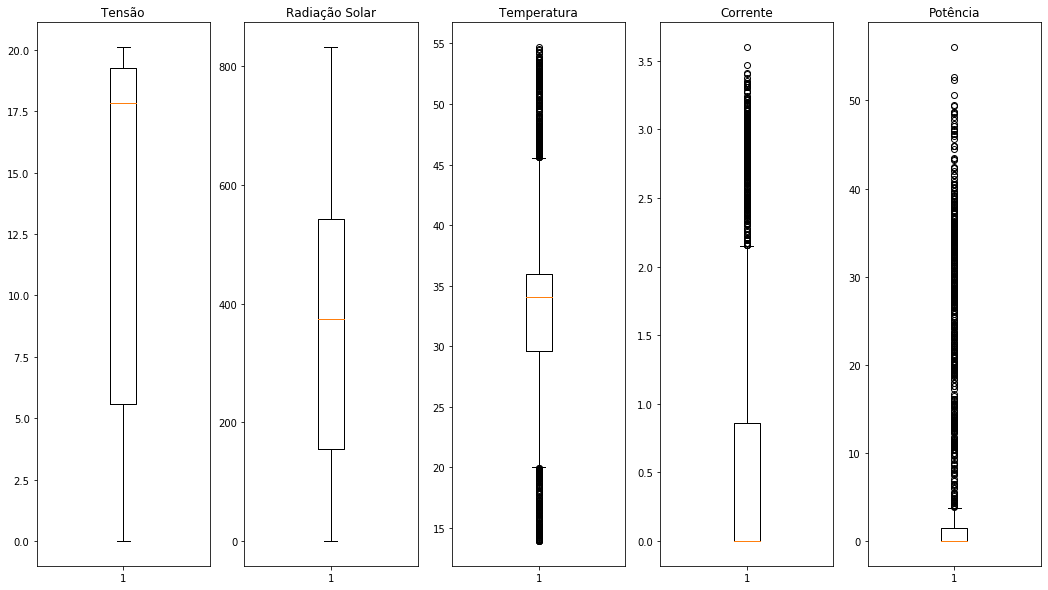

In [9]:
plt.figure(figsize=(18,10))
plt.subplot(151)
plt.boxplot(data['tensao'])
plt.title('Tensão')
plt.subplot(152)
plt.boxplot(data['radiacao'])
plt.title('Radiação Solar')
plt.subplot(153)
plt.boxplot(data['temperatura'])
plt.title('Temperatura')
plt.subplot(154)
plt.boxplot(data['corrente'])
plt.title('Corrente')
plt.subplot(155)
plt.boxplot(data['potencia'])
plt.title('Potência')


In [10]:
dataccbl=data[(data.potencia>0) & (data.bomba==1)] # dados com carga e bomba ligada
dataccbd=data[(data.potencia>0) & (data.bomba==0)] # dados com carga e bomba desligada
datascbl=data[(data.potencia==0) & (data.bomba==1)] # dados sem carga e bomba ligada
datascbd=data[(data.potencia==0) & (data.bomba==0)] # dados sem carga e bomba desligada

## Etapa 1: Análise do módulo operando em modo circuito-aberto (sem carga) e sem sistema de resfriamento

Text(0.5, 1.0, 'Temperatura')

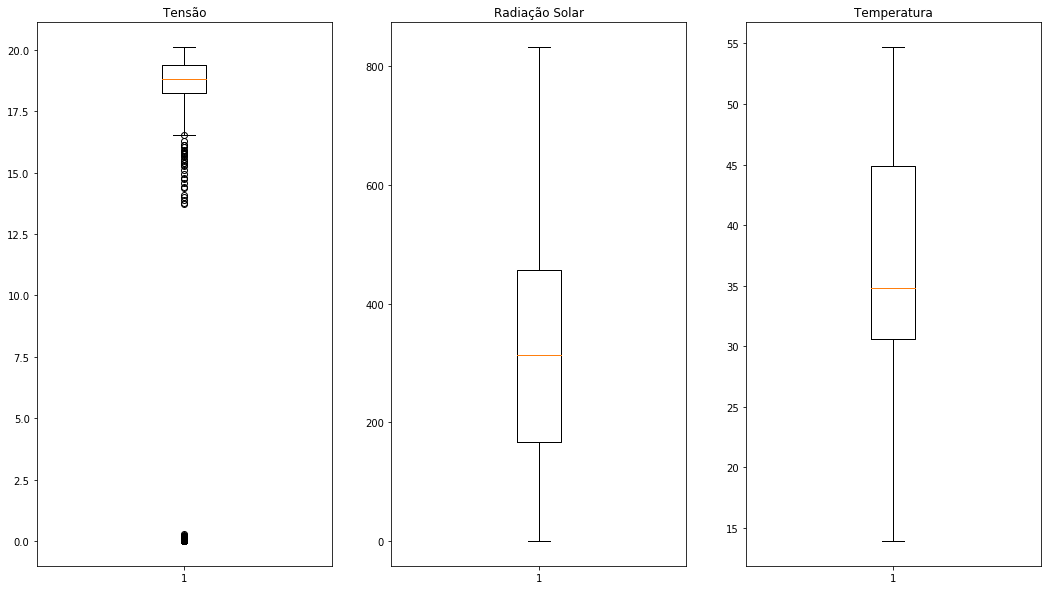

In [11]:
plt.figure(figsize=(18,10))
plt.subplot(131)
plt.boxplot(datascbd['tensao'])
plt.title('Tensão')
plt.subplot(132)
plt.boxplot(datascbd['radiacao'])
plt.title('Radiação Solar')
plt.subplot(133)
plt.boxplot(datascbd['temperatura'])
plt.title('Temperatura')

In [12]:
datascbd = datascbd[(datascbd.tensao>17)]

Text(0.5, 1.0, 'Temperatura')

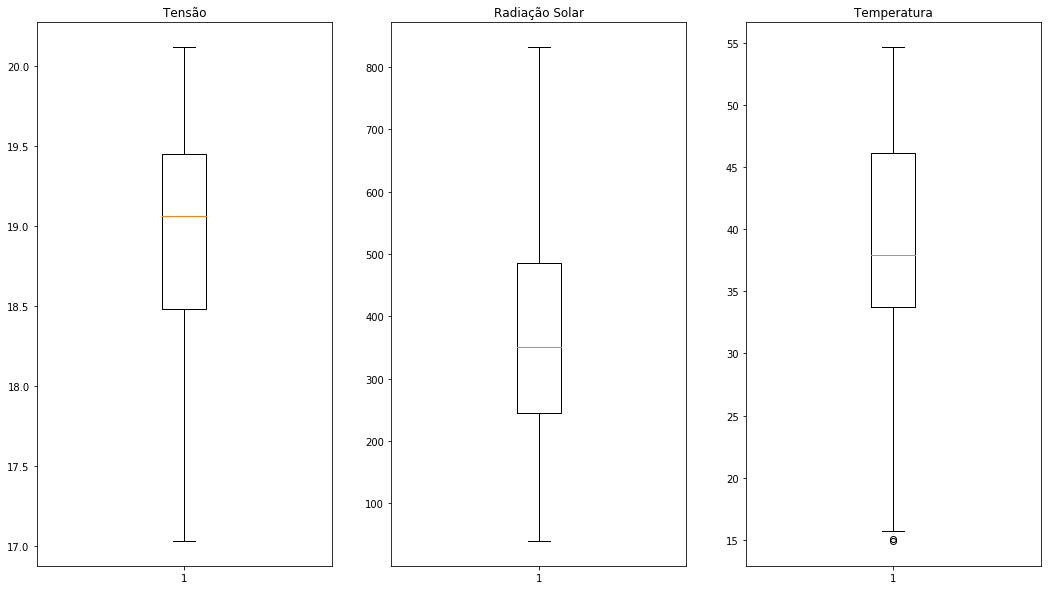

In [13]:
plt.figure(figsize=(18,10))
plt.subplot(131)
plt.boxplot(datascbd['tensao'])
plt.title('Tensão')
plt.subplot(132)
plt.boxplot(datascbd['radiacao'])
plt.title('Radiação Solar')
plt.subplot(133)
plt.boxplot(datascbd['temperatura'])
plt.title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

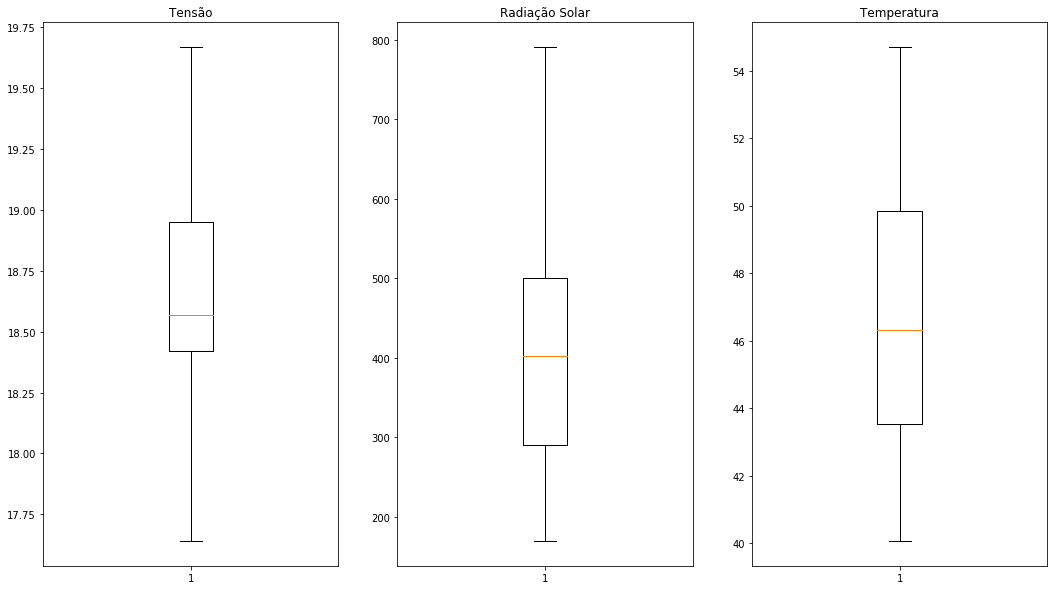

In [14]:
datascbd = datascbd[(datascbd.temperatura>40)&(datascbd.radiacao<801)& (datascbd.tensao>17.6)] #35ºC é o valor máximo que o sistema de resfriamento consegue refrigerar o módulo.

plt.figure(figsize=(18,10))
plt.subplot(131)
plt.boxplot(datascbd['tensao'])
plt.title('Tensão')
plt.subplot(132)
plt.boxplot(datascbd['radiacao'])
plt.title('Radiação Solar')
plt.subplot(133)
plt.boxplot(datascbd['temperatura'])
plt.title('Temperatura')

In [15]:
datascbd.describe()

,horario,temperatura,tensao,corrente,radiacao,potencia,bomba
count,430.000000,430.000000,430.000000,430.0,430.000000,430.0,430.0
mean,12.676974,46.725674,18.641977,0.0,414.711814,0.0,0.0
std,2.165684,3.822881,0.375292,0.0,146.877137,0.0,0.0
min,8.966670,40.070000,17.640000,0.0,169.430000,0.0,0.0
25%,10.804168,43.530000,18.420000,0.0,289.912500,0.0,0.0
50%,12.641665,46.320000,18.570000,0.0,402.120000,0.0,0.0
75%,14.512495,49.842500,18.950000,0.0,500.605000,0.0,0.0
max,16.433330,54.710000,19.670000,0.0,790.730000,0.0,0.0


Como temos variáveis distintas com fundos de escala diferentes, vamos utilizar o conceito de PU para deixá-las todas na mesma proporção, de 0 a 1.

In [16]:
datascbdbase = datascbd.copy()

vscbdbase = max(datascbd.tensao)
rscbdbase = max(datascbd.radiacao)
tscbdbase = max(datascbd.temperatura)

datascbdbase.tensao = datascbd.tensao/vscbdbase
datascbdbase.radiacao = datascbd.radiacao/rscbdbase
datascbdbase.temperatura = datascbd.temperatura/tscbdbase

colnames=['tensao','temperatura','horario','radiacao']

datascbdbase=datascbdbase[colnames]

datascbdbase.head()

,tensao,temperatura,horario,radiacao
118,0.970513,0.732773,8.96667,0.460208
121,0.970513,0.744471,9.01667,0.467922
122,0.969497,0.750137,9.03333,0.470945
123,0.969497,0.750137,9.05000,0.473980
124,0.968480,0.750868,9.06667,0.473980


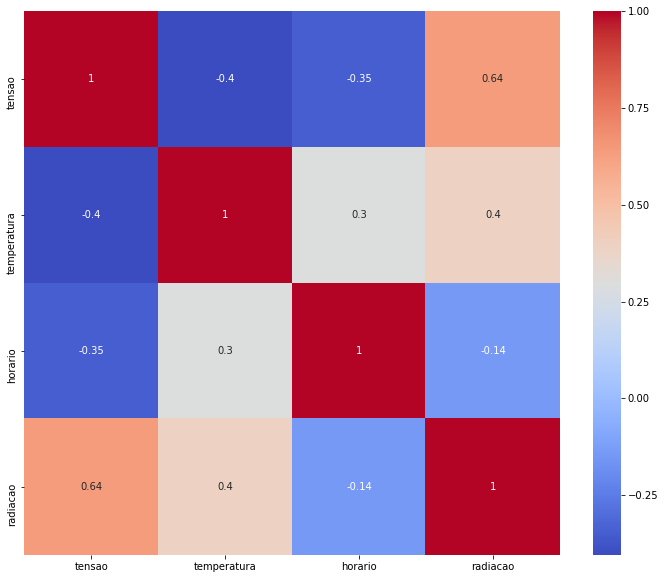

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(datascbdbase[colnames].corr(method='pearson'),cmap='coolwarm',annot=True)

Como era de se esperar, podemos notar que a tensão apresenta uma correlação com a radiação solar quase que diretamente proporcional. Em contrapartida, quando analisamos sua correlação com a temperatura, verificamos que ela é inversamente proporcional. É do conhecimento de cientistas e pesquisadores que a temperatura de operação do módulo fotovoltaico influencia em sua eficiência. Vamos analisar com mais detalhes:

<Figure size 864x720 with 0 Axes>

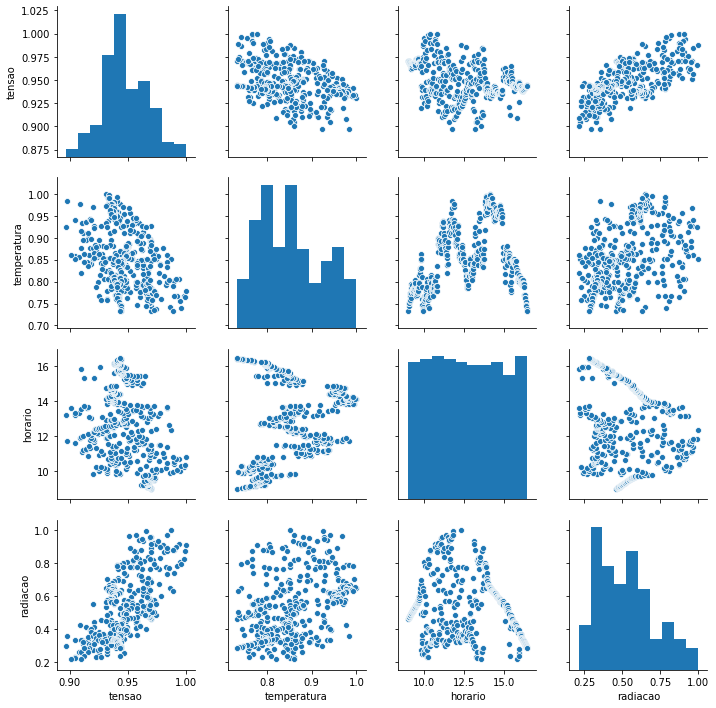

In [18]:
plt.figure(figsize=(12,10))
sns.pairplot(datascbdbase[colnames])

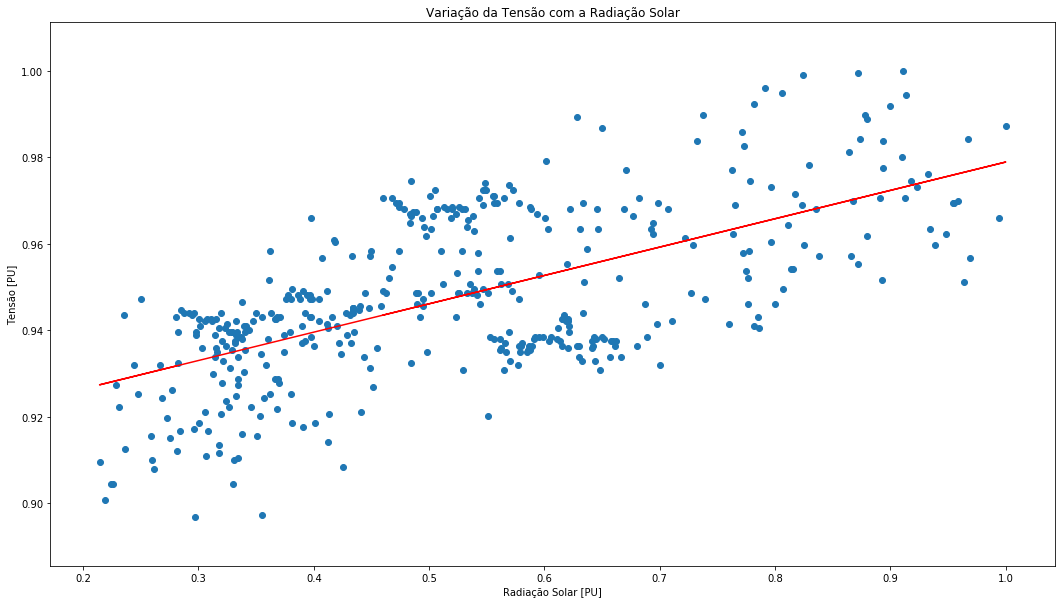

In [19]:
plt.figure(figsize=(18,10))
plt.scatter(datascbdbase.radiacao, datascbdbase.tensao)
m, b = np.polyfit(datascbdbase.radiacao, datascbdbase.tensao, 1)
plt.plot(datascbdbase.radiacao, m*datascbdbase.radiacao + b, color='red')
plt.title('Variação da Tensão com a Radiação Solar')
plt.ylabel('Tensão [PU]')
plt.xlabel('Radiação Solar [PU]')
plt.show()

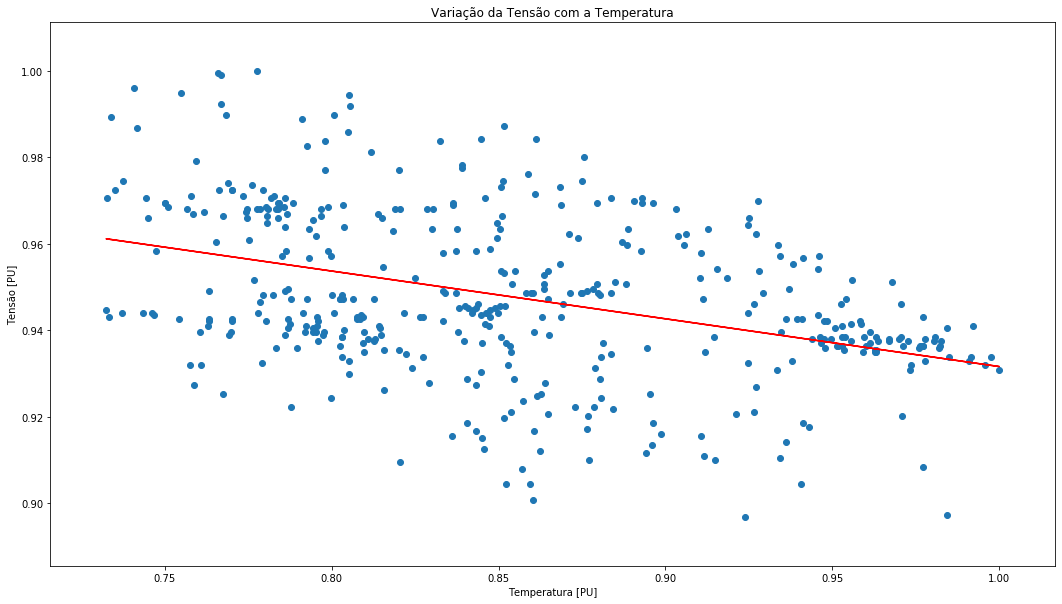

In [20]:
plt.figure(figsize=(18,10))
plt.scatter(datascbdbase.temperatura, datascbdbase.tensao)
m, b = np.polyfit(datascbdbase.temperatura, datascbdbase.tensao, 1)
plt.plot(datascbdbase.temperatura, m*datascbdbase.temperatura + b, color='red')
plt.title('Variação da Tensão com a Temperatura')
plt.ylabel('Tensão [PU]')
plt.xlabel('Temperatura [PU]')
plt.show()

### Implementando a Regressão Linear Múltipla

Vamos implementar a regressão linear múltipla e tentar prever o valor da tensão com base na temperatura e na radiação solar.

In [21]:
datareg = datascbdbase[['tensao','temperatura','radiacao']]
datareg.head()

,tensao,temperatura,radiacao
118,0.970513,0.732773,0.460208
121,0.970513,0.744471,0.467922
122,0.969497,0.750137,0.470945
123,0.969497,0.750137,0.473980
124,0.968480,0.750868,0.473980


In [22]:
datareg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 118 to 566
Data columns (total 3 columns):
tensao         430 non-null float64
temperatura    430 non-null float64
radiacao       430 non-null float64
dtypes: float64(3)
memory usage: 33.4 KB


O dataset possui 430 entradas, vamos separá-lo aleatóriamente em treino (65%) e teste (35%)

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

linear_regression = LinearRegression()

Xtreino, Xteste, ytreino, yteste = train_test_split(datareg[['radiacao','temperatura']], datareg['tensao'], test_size=0.35, random_state=42)

linear_regression.fit(Xtreino,ytreino)

ypred = linear_regression.predict(Xteste)

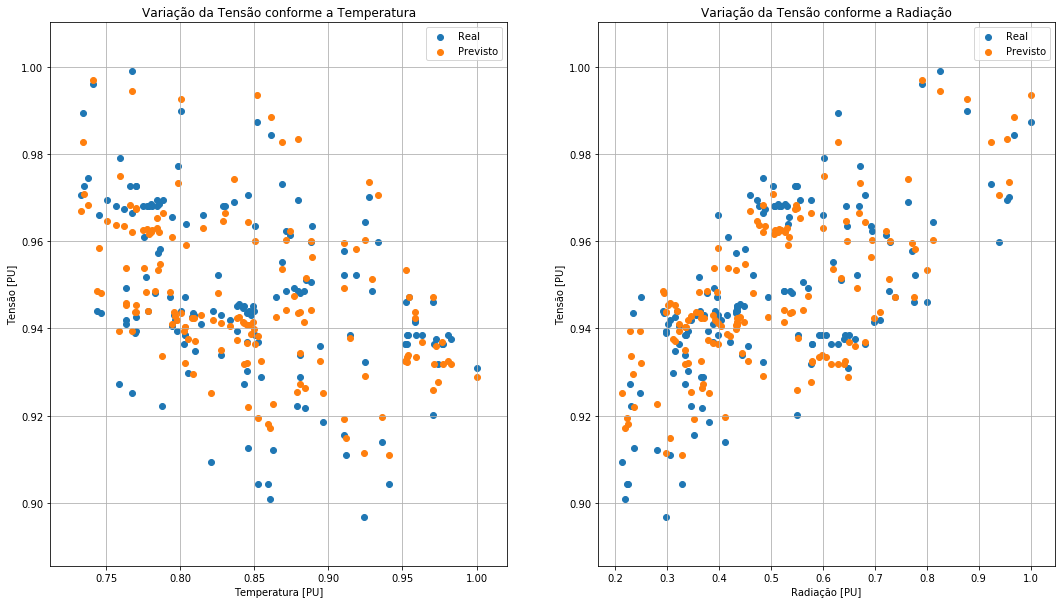

In [209]:
plt.figure(figsize=(18,10))
plt.subplot(121)
plt.scatter(Xteste['temperatura'],yteste, label='Real')
plt.scatter(Xteste['temperatura'],ypred, label='Previsto')
plt.ylabel('Tensão [PU]')
plt.xlabel('Temperatura [PU]')
plt.title('Variação da Tensão conforme a Temperatura')
plt.grid()
plt.legend()
plt.subplot(122)
plt.scatter(Xteste['radiacao'],yteste, label='Real')
plt.scatter(Xteste['radiacao'],ypred, label='Previsto')
plt.ylabel('Tensão [PU]')
plt.xlabel('Radiação [PU]')
plt.title('Variação da Tensão conforme a Radiação')
plt.grid()
plt.legend()
plt.show()

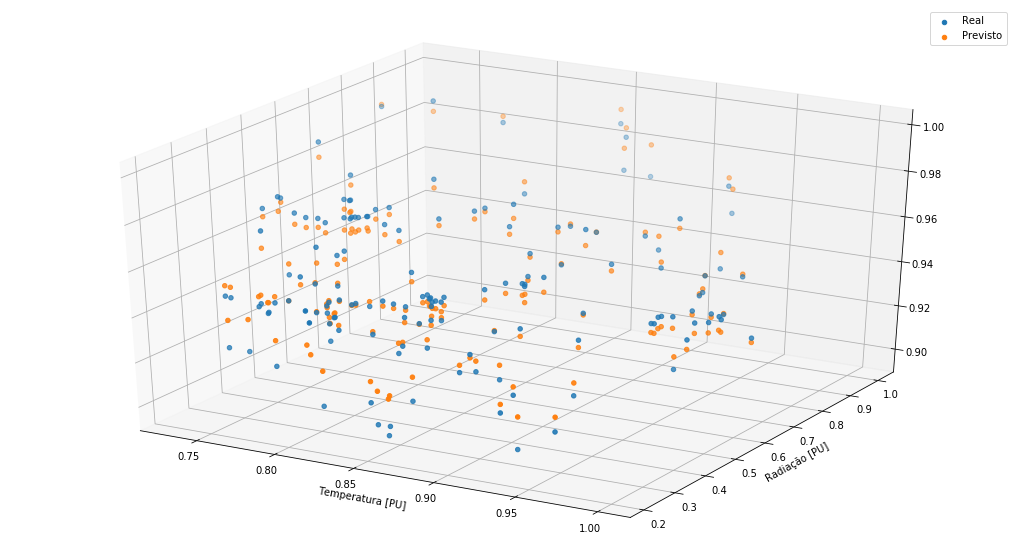

In [153]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(18,10))
ax = plt.axes(projection='3d')
ax.scatter3D(Xteste['temperatura'],Xteste['radiacao'], yteste, label='Real')
ax.scatter3D(Xteste['temperatura'],Xteste['radiacao'], ypred, label='Previsto')
plt.ylabel('Radiação [PU]')
plt.xlabel('Temperatura [PU]')
plt.legend()
plt.show()

### Desempenho

In [154]:
print("Mean Squared Error: ", mean_squared_error(yteste,ypred)*vscbdbase) 
print("Root Mean Squared Error: ", sqrt(mean_squared_error(yteste,ypred))*vscbdbase) 
print("R2: ", r2_score(yteste,ypred))

Mean Squared Error:  0.0006299897052398717
Root Mean Squared Error:  0.11131890002182143
R2:  0.9160624314888901


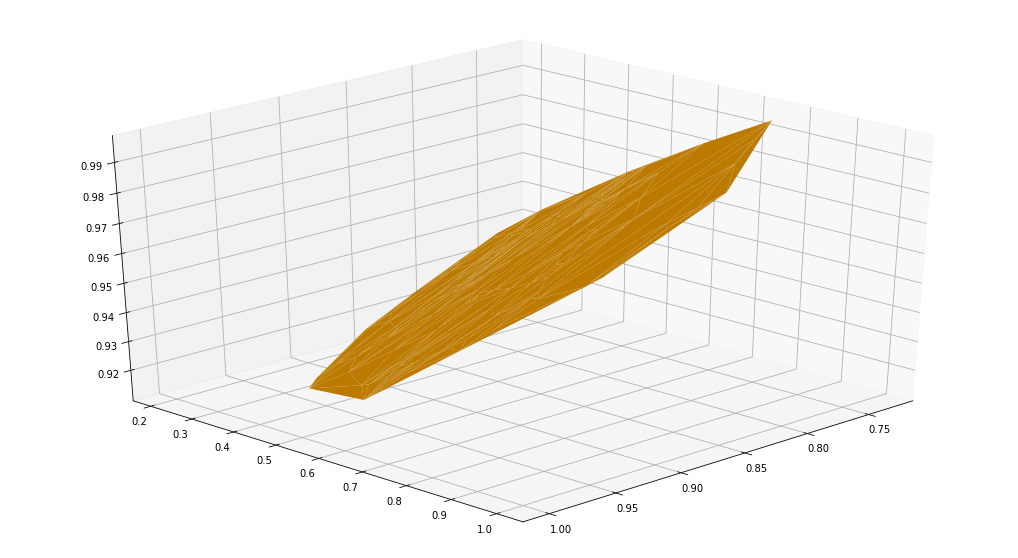

In [27]:
x = Xteste['temperatura'].ravel()
y = Xteste['radiacao'].ravel()
z=linear_regression.predict(Xteste).ravel()

fig = plt.figure(figsize=(18,10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(x,y,z, color='orange')
ax.view_init(30,45)
plt.show()


Podemos notar que o modelo criado está sofrendo de 'overfitting', pois conforme pode-se ver nos gráficos acima, há variações muito bruscas (R2 alto) e o erro calculado está muito pequeno. Vamos utilizar a técnica de Ridge para melhorar o modelo.

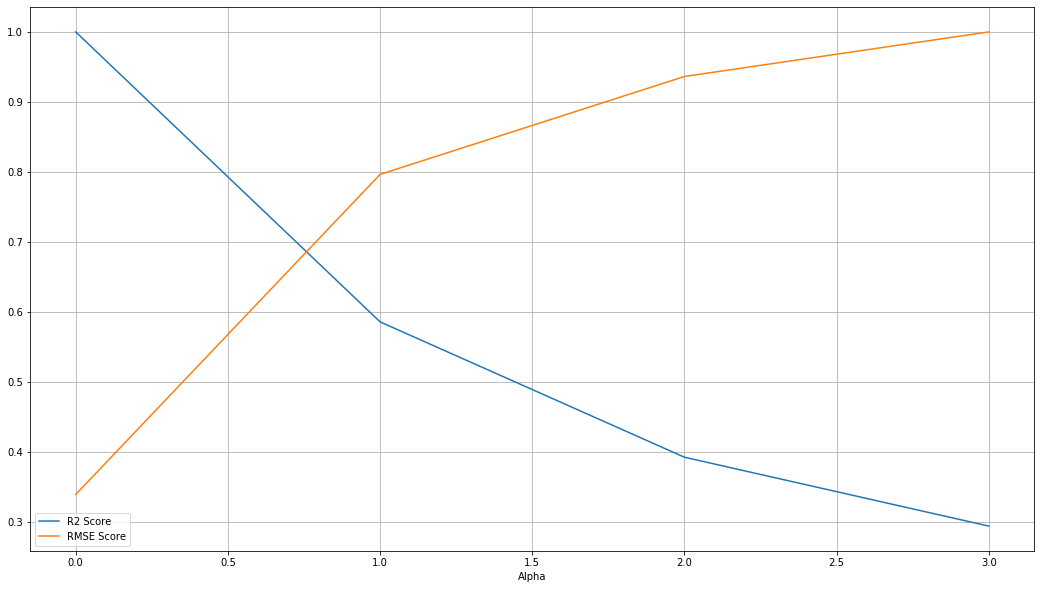

In [201]:
from sklearn.linear_model import Ridge

rmse2 = []

r2score = []

lista = np.arange(0,4,0.1).astype(int)  

for i in lista :
    ridgereg = Ridge(alpha=i, normalize=True)
    ridgereg.fit(Xtreino, ytreino)
    ypredridge = ridgereg.predict(Xteste)
    rmse2.append(sqrt(mean_squared_error(yteste,ypredridge)))
    r2score.append(r2_score(yteste,ypredridge))

plt.figure(figsize=(18,10))
plt.plot(lista,np.array(r2score)/max(r2score),label='R2 Score')
plt.plot(lista,np.array(rmse2)/max(rmse2), label=('RMSE Score'))
plt.grid()
plt.legend()
plt.xlabel('Alpha')
plt.show()


Calculamos o R² e o RMSE para vários valores de Alpha. Iremos escolher Alpha igual a 0.76, que é o ponto onde ambas as curvas se cruzam no gráfico. Para valores maiores de Alpha, o erro tende a ser maior. Para valores menores de Alpha, o R² tende a ser muito próximo de 1. Desta maneira, a intersecção das curvas revela o ponto ótimo do modelo.

In [203]:
ridgereg = Ridge(alpha=0.76, normalize=True)
ridgereg.fit(Xtreino, ytreino)
ypredridge2 = ridgereg.predict(Xteste)

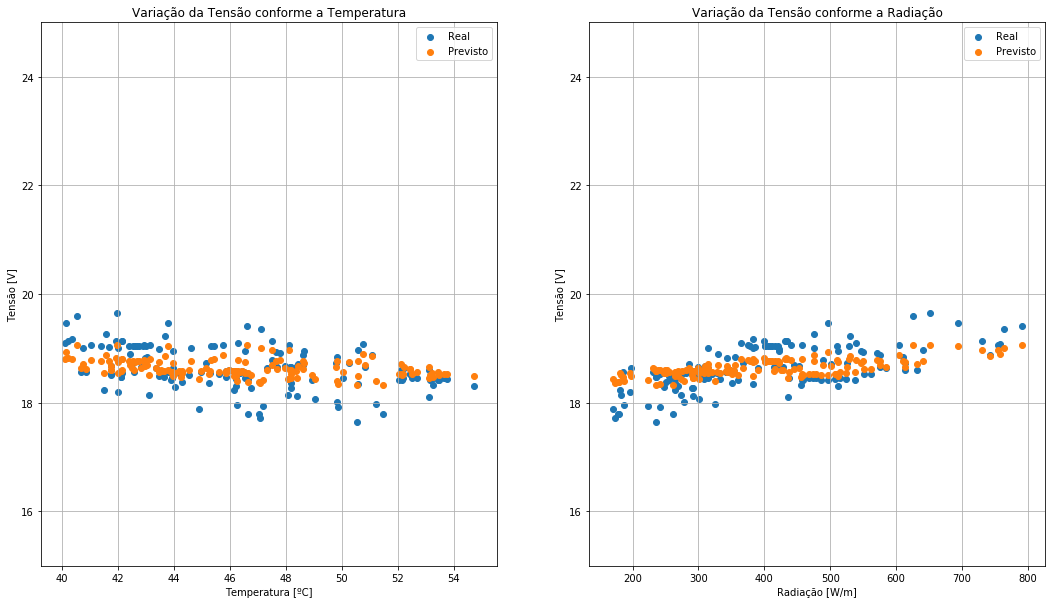

In [206]:
plt.figure(figsize=(18,10))
plt.subplot(121)
plt.scatter(Xteste['temperatura']*tscbdbase,yteste*vscbdbase, label='Real')
plt.scatter(Xteste['temperatura']*tscbdbase,ypredridge2*vscbdbase, label='Previsto')
plt.ylabel('Tensão [V]')
plt.xlabel('Temperatura [ºC]')
plt.title('Variação da Tensão conforme a Temperatura')
plt.grid()
plt.legend()
plt.ylim(15,25)
plt.subplot(122)
plt.scatter(Xteste['radiacao']*rscbdbase,yteste*vscbdbase, label='Real')
plt.scatter(Xteste['radiacao']*rscbdbase,ypredridge2*vscbdbase, label='Previsto')
plt.ylabel('Tensão [V]')
plt.xlabel('Radiação [W/m]')
plt.title('Variação da Tensão conforme a Radiação')
plt.grid()
plt.legend()
plt.ylim(15,25)
plt.show()

In [207]:
print("Mean Squared Error: ", mean_squared_error(yteste,ypredridge2)*vscbdbase) 
print("Root Mean Squared Error: ", sqrt(mean_squared_error(yteste,ypredridge2))*vscbdbase) 
print("R2: ", r2_score(yteste,ypredridge))

Mean Squared Error:  0.0029561284626049076
Root Mean Squared Error:  0.24113698774646444
R2:  0.6061360474722923


## Etapa 2: Análise do módulo operando em modo circuito-aberto (sem carga) e com sistema de resfriamento

Text(0.5, 1.0, 'Temperatura')

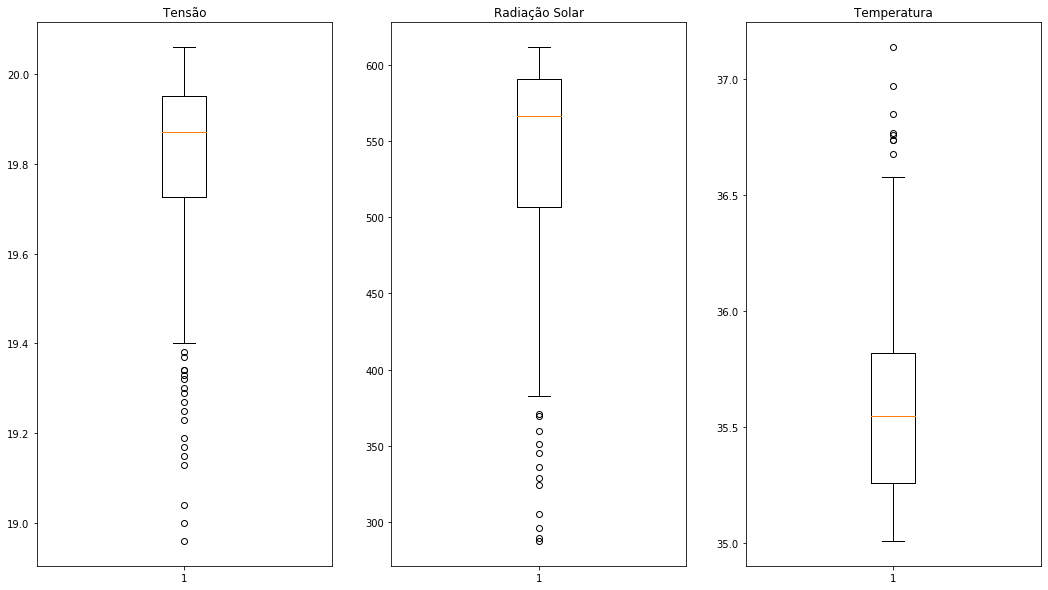

In [28]:
plt.figure(figsize=(18,10))
plt.subplot(131)
plt.boxplot(datascbl['tensao'])
plt.title('Tensão')
plt.subplot(132)
plt.boxplot(datascbl['radiacao'])
plt.title('Radiação Solar')
plt.subplot(133)
plt.boxplot(datascbl['temperatura'])
plt.title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

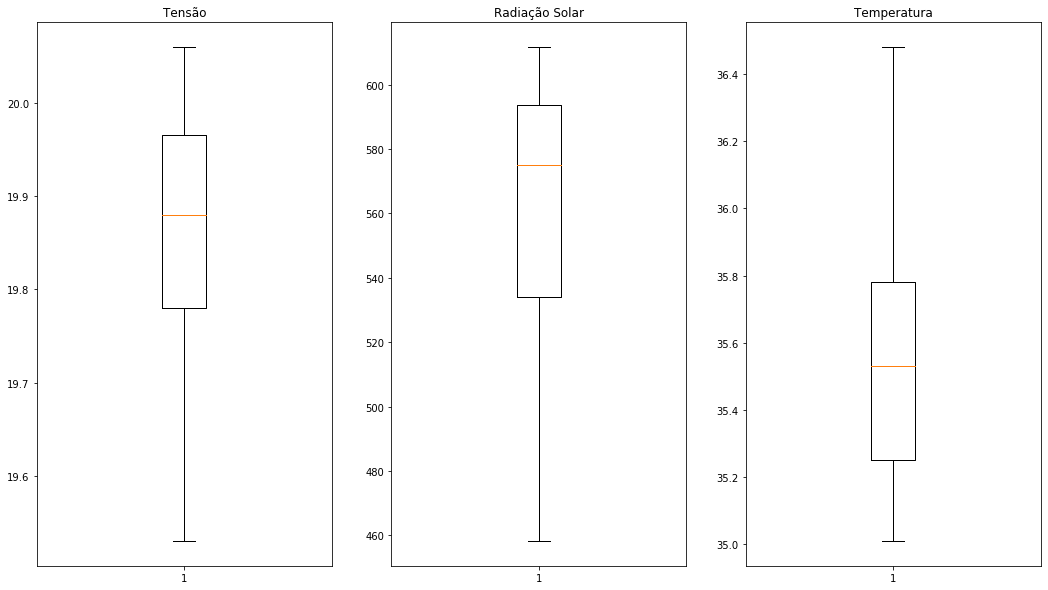

In [29]:
datascbl = datascbl[(datascbl.temperatura<36.5)&(datascbl.radiacao>450)& (datascbl.tensao>19.5)]
plt.figure(figsize=(18,10))
plt.subplot(131)
plt.boxplot(datascbl['tensao'])
plt.title('Tensão')
plt.subplot(132)
plt.boxplot(datascbl['radiacao'])
plt.title('Radiação Solar')
plt.subplot(133)
plt.boxplot(datascbl['temperatura'])
plt.title('Temperatura')

In [30]:
datascblbase = datascbl.copy()

vscblbase = max(datascbl.tensao)
rscblbase = max(datascbl.radiacao)
tscblbase = max(datascbl.temperatura)

datascblbase.tensao = datascbl.tensao/vscblbase
datascblbase.radiacao = datascbl.radiacao/rscblbase
datascblbase.temperatura = datascbl.temperatura/tscblbase

colnames=['tensao','temperatura','horario','radiacao']

datascblbase=datascblbase[colnames]

datascblbase.head()

,tensao,temperatura,horario,radiacao
750,0.988534,0.965461,9.48333,0.760773
760,0.978564,0.973958,9.65000,0.786046
764,0.977567,0.961349,9.71667,0.798862
766,0.984546,0.962993,9.75000,0.804567
769,0.980060,0.968750,9.80000,0.806693


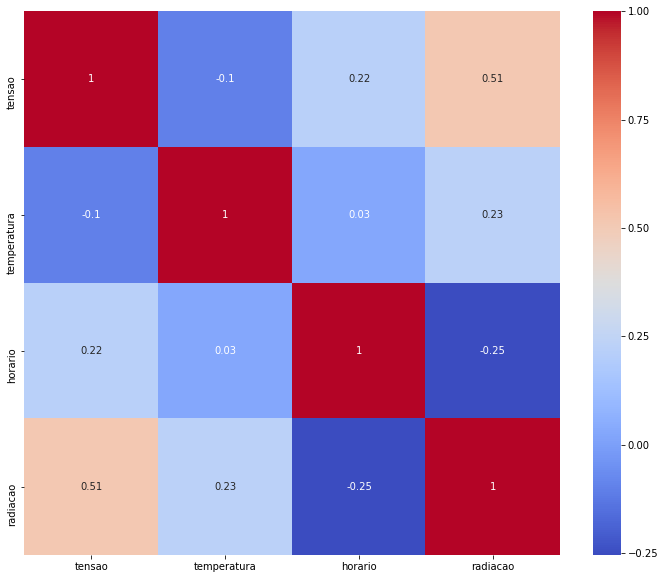

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(datascblbase[colnames].corr(method='pearson'),cmap='coolwarm',annot=True)

<Figure size 864x720 with 0 Axes>

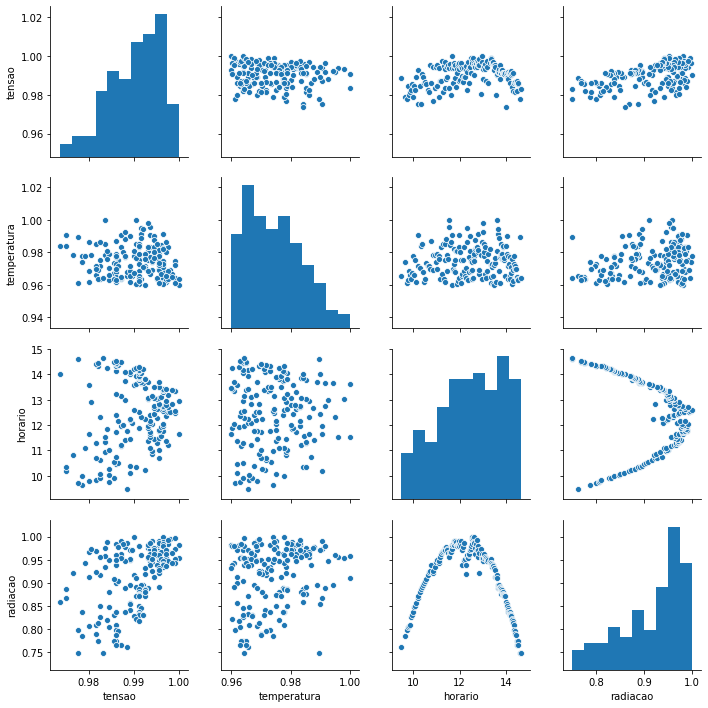

In [32]:
plt.figure(figsize=(12,10))
sns.pairplot(datascblbase[colnames])

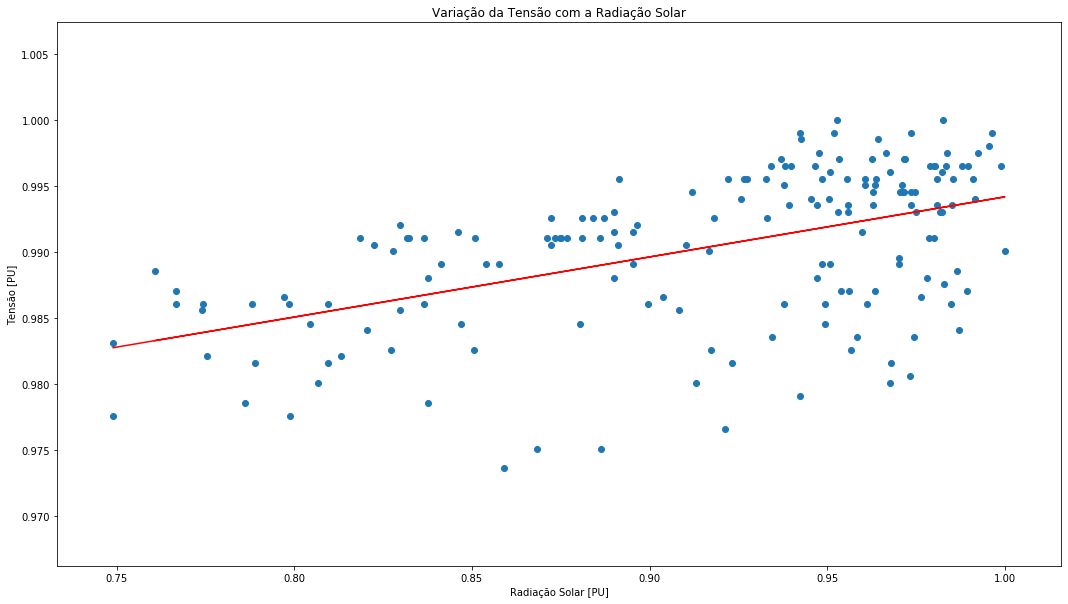

In [33]:
plt.figure(figsize=(18,10))
plt.scatter(datascblbase.radiacao, datascblbase.tensao)
m, b = np.polyfit(datascblbase.radiacao, datascblbase.tensao, 1)
plt.plot(datascblbase.radiacao, m*datascblbase.radiacao + b, color='red')
plt.title('Variação da Tensão com a Radiação Solar')
plt.ylabel('Tensão [PU]')
plt.xlabel('Radiação Solar [PU]')
plt.show()

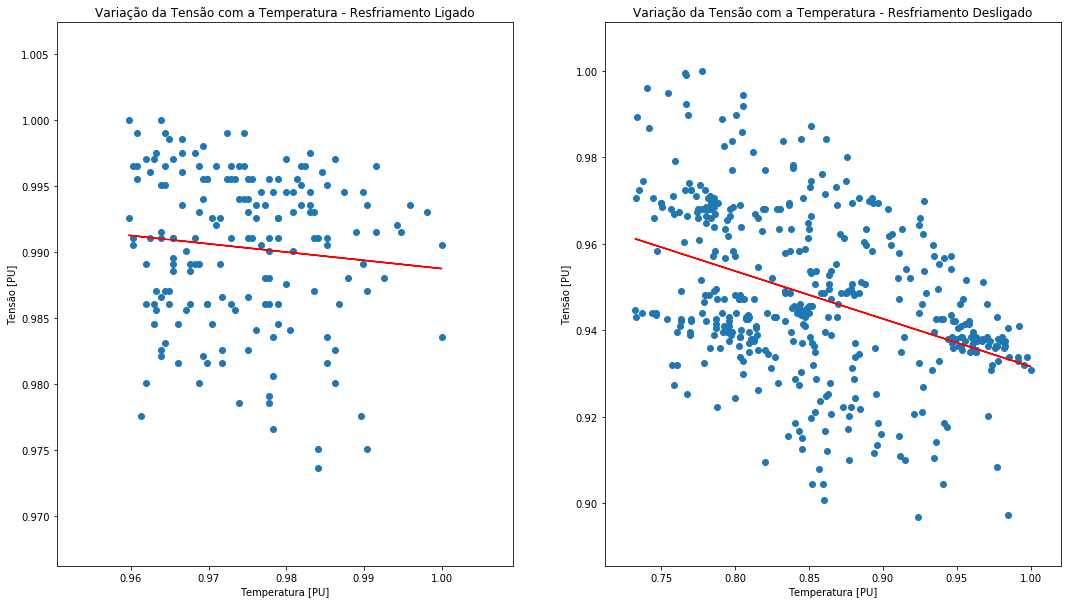

In [34]:
plt.figure(figsize=(18,10))
plt.subplot(121)
plt.scatter(datascblbase.temperatura, datascblbase.tensao)
m1, b1 = np.polyfit(datascblbase.temperatura, datascblbase.tensao, 1)
plt.plot(datascblbase.temperatura, m1*datascblbase.temperatura + b1, color='red')
plt.title('Variação da Tensão com a Temperatura - Resfriamento Ligado')
plt.ylabel('Tensão [PU]')
plt.xlabel('Temperatura [PU]')
plt.subplot(122)
plt.scatter(datascbdbase.temperatura, datascbdbase.tensao)
m2, b2 = np.polyfit(datascbdbase.temperatura, datascbdbase.tensao, 1)
plt.plot(datascbdbase.temperatura, m2*datascbdbase.temperatura + b2, color='red')
plt.title('Variação da Tensão com a Temperatura - Resfriamento Desligado')
plt.ylabel('Tensão [PU]')
plt.xlabel('Temperatura [PU]')
plt.show()

Pela matriz de correlação, podemos ver que com o controle de temperatura (<35ºC) a correlação entre esta e a tensão tende a diminuir quando comparado com o sistema sem resfriamento. É possível ver tal afirmação a partir do gráfico acima.

In [35]:
print("Variação de Tensão para Cada ºC em PU (Com Refrigeração): ",m1)
print("Variação de Tensão para Cada ºC em PU (Sem Refrigeração): ",m2)

Variação de Tensão para Cada ºC em PU (Com Refrigeração):  -0.06254984222126438
Variação de Tensão para Cada ºC em PU (Sem Refrigeração):  -0.11037536109248604


Vejamos que pelos coeficientes angulares das retas, o sistema com refrigeração apresenta uma depreciação menor de sua tensão de circuito-aberto, com a temperatura controlada.

## Etapa 3: Análise do módulo operando com carga e sem sistema de resfriamento

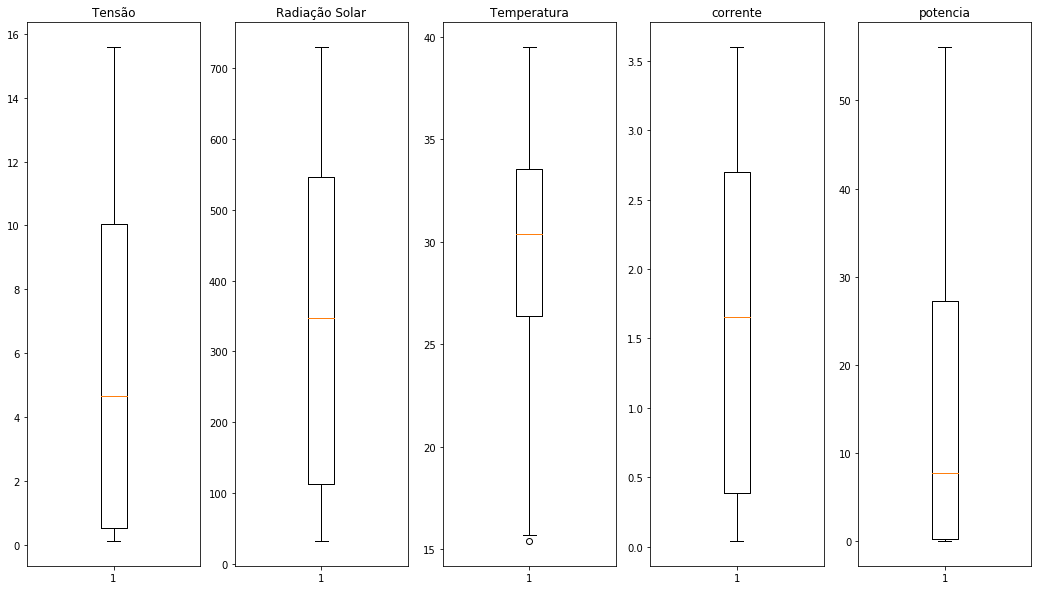

In [212]:
dataccbd3 = dataccbd
plt.figure(figsize=(18,10))
plt.subplot(151)
plt.boxplot(dataccbd3['tensao'])
plt.title('Tensão')
plt.subplot(152)
plt.boxplot(dataccbd3['radiacao'])
plt.title('Radiação Solar')
plt.subplot(153)
plt.boxplot(dataccbd3['temperatura'])
plt.title('Temperatura')
plt.subplot(154)
plt.boxplot(dataccbd3['corrente'])
plt.title('corrente')
plt.subplot(155)
plt.boxplot(dataccbd3['potencia'])
plt.title('potencia')
plt.show()

## Etapa 4: Análise do módulo operando com carga e com sistema de resfriamento

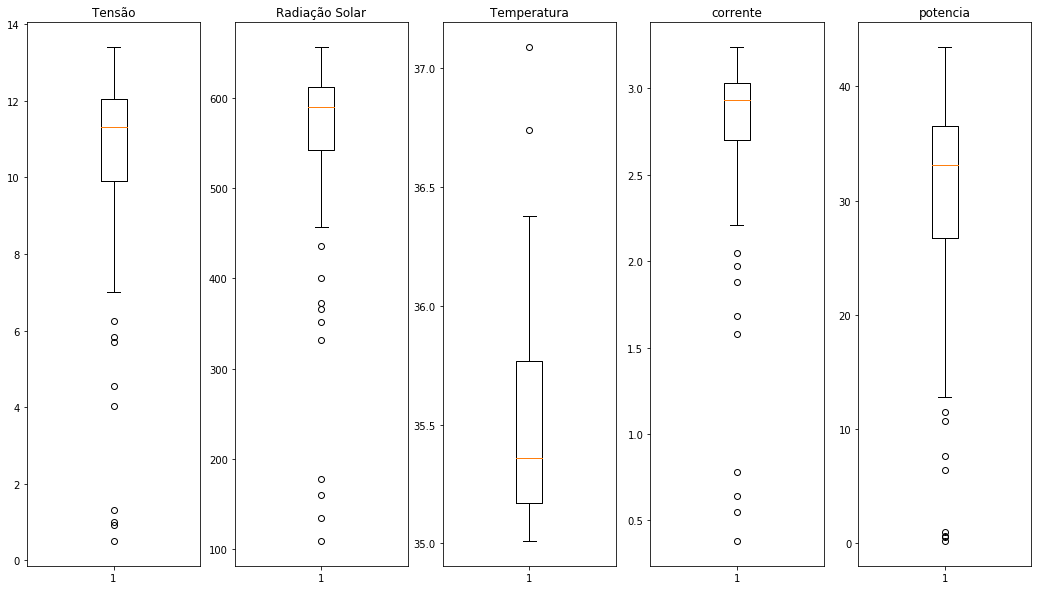

In [213]:
dataccbl4 = dataccbl
plt.figure(figsize=(18,10))
plt.subplot(151)
plt.boxplot(dataccbl4['tensao'])
plt.title('Tensão')
plt.subplot(152)
plt.boxplot(dataccbl4['radiacao'])
plt.title('Radiação Solar')
plt.subplot(153)
plt.boxplot(dataccbl4['temperatura'])
plt.title('Temperatura')
plt.subplot(154)
plt.boxplot(dataccbl4['corrente'])
plt.title('corrente')
plt.subplot(155)
plt.boxplot(dataccbl4['potencia'])
plt.title('potencia')
plt.show()

## Comparação

Text(0.5, 0, 'Radiação [W/m]')

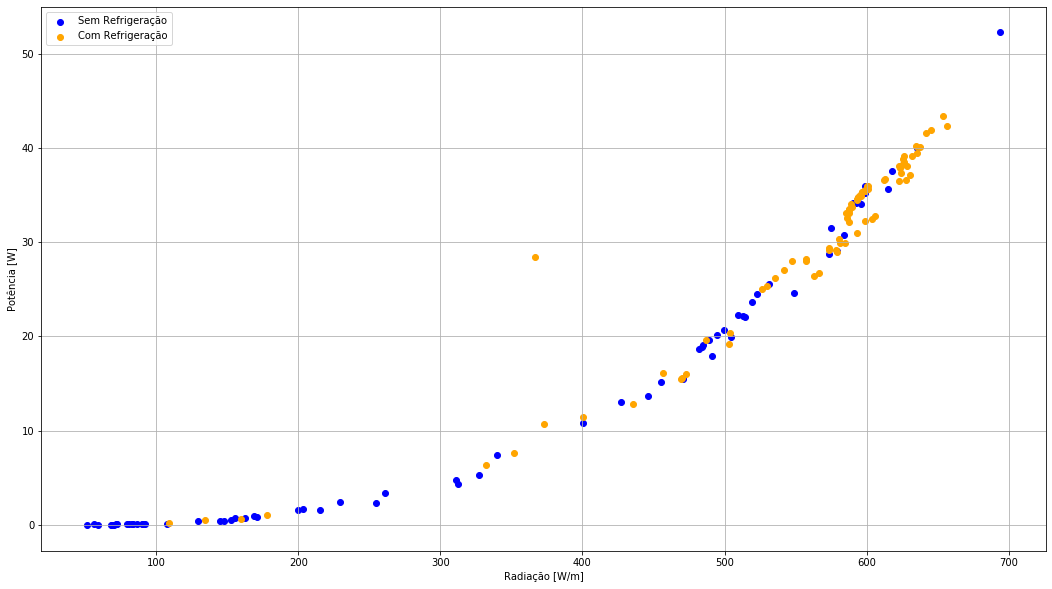

In [215]:
plt.figure(figsize=(18,10))
dataccbd4 = dataccbd3.sample(70)
plt.scatter(dataccbd4.radiacao,dataccbd4.potencia,color='blue', label="Sem Refrigeração")
plt.scatter(dataccbl4.radiacao,dataccbl4.potencia, color='orange',label="Com Refrigeração")
plt.grid()
plt.legend()
plt.ylabel('Potência [W]')
plt.xlabel('Radiação [W/m]')

Os dados nesta última etapa foram insuficientes, não é possível se avaliar com precisão a eficiência do módulo. Percebe-se que não houve diferença significante na potência gerada com e sem sistema de resfriamento (os pontos se sobrepõem). 